# Histogram equalization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, img_as_float

In [ ]:
image = data.camera()

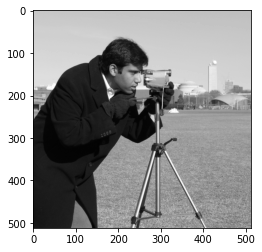

dtype('uint8')

In [ ]:
plt.imshow(image, cmap=plt.cm.gray)
plt.show()
image.dtype

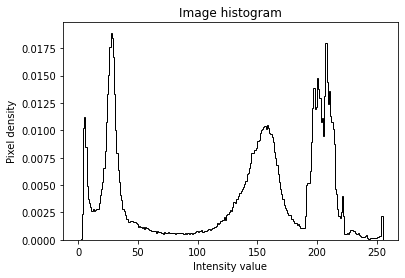

In [15]:
(pixels_per_bin, bins, patches) = plt.hist(image.ravel(), bins=255,\
                                           density=True, histtype='step',\
                                           color='black')
plt.xlabel('Intensity value')
plt.ylabel('Pixel density')
plt.title('Image histogram')
plt.show()

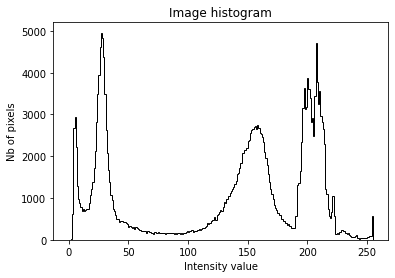

In [16]:
plt.hist(image.ravel(), bins=255,\
        density=False, histtype='step', color='black')
plt.xlabel('Intensity value')
plt.ylabel('Nb of pixels')
plt.title('Image histogram')
plt.show()

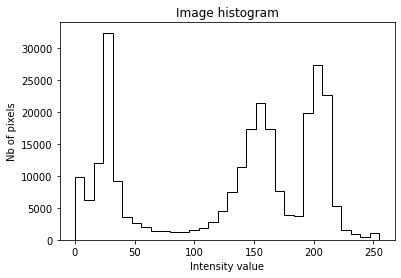

In [13]:
# With a different number of bins
plt.hist(image.ravel(), bins=32,\
         histtype='step', color='black')
plt.xlabel('Intensity value')
plt.ylabel('Nb of pixels')
plt.title('Image histogram')
plt.show()

In [12]:
# Check the probability density function sums to one
np.sum(pixels_per_bin)

1.0

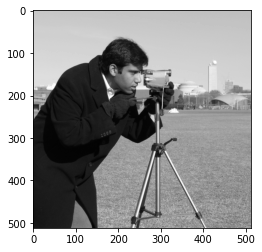

In [7]:
# Check that reshape can invert the ravel step
plt.imshow(np.reshape(image.ravel(),image.shape), cmap=plt.cm.gray)
plt.show()

In [28]:
# Compute the new values of the pixels to have an equalized histogram
flat_vector_image = image.ravel()
flat_image_EQ = np.zeros(flat_vector_image.shape)
for idx, pixel_value in enumerate(flat_vector_image):
    new_value = 255 * np.sum(pixels_per_bin[:int(pixel_value)])
    flat_image_EQ[idx] = new_value
image_EQ = np.reshape(flat_image_EQ, image.shape)

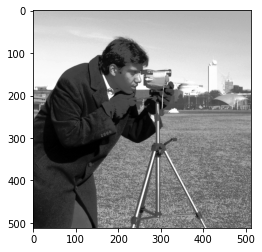

In [29]:
plt.imshow(image_EQ, cmap=plt.cm.gray)
plt.show()

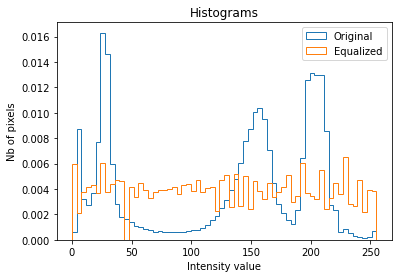

In [44]:
plt.hist(image.ravel(), bins=64, density=True, histtype='step', label='Original')
plt.hist(image_EQ.ravel(), bins=64, density=True, histtype='step', label='Equalized')
plt.xlabel('Intensity value')
plt.ylabel('Nb of pixels')
plt.title('Histograms')
plt.legend()
plt.show()